In [8]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [9]:
from fastai.conv_learner import *
from fastai.transforms import *
import torch

PATH = Path('data/lyft')
sz = 128

In [10]:
def show_img(im, figsize=(8,8), ax=None, alpha=None):
    if not ax: fix, ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [11]:
class StdUpsample(nn.Module):
    def __init__(self, nin, nout):
        super().__init__()
        self.conv = nn.ConvTranspose2d(nin, nout, 2, stride=2)
        self.bn = nn.BatchNorm2d(nout)
        
    def forward(self, x): return self.bn(F.relu(self.conv(x)))

def not_lambda(x): return x[:,0] # TODO: Rename this please

flatten_channel = Lambda(not_lambda)

simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel
)

In [12]:
aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
            RandomFlip(tfm_y=TfmType.CLASS),
            RandomLighting(0.05, 0.05)]

transforms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)

In [30]:
learn2 = torch.load('road-fullmodel.pt')

In [14]:
im = open_image(PATH/'train/100.png')

In [15]:
train_tfms, val_tfms = transforms
aug_t, aug_v = val_tfms(im, im)

In [17]:
im_with_batch = V(aug_t).unsqueeze_(0)

In [18]:
im_with_batch.shape

torch.Size([1, 3, 128, 128])

In [20]:
pred = learn2(im_with_batch)

In [23]:
pred_np = to_np(pred)

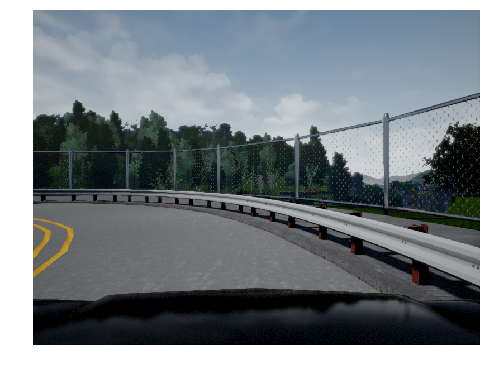

In [25]:
show_img(im)

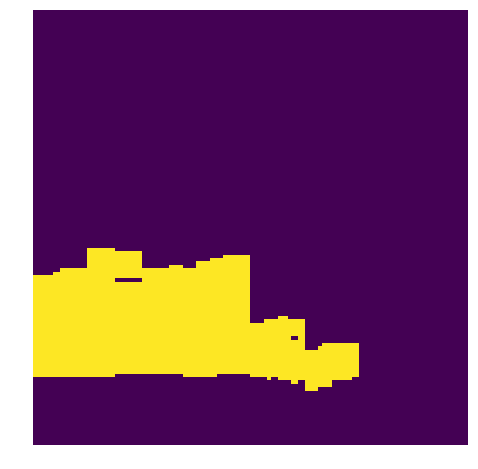

In [27]:
show_img(pred_np[0,...]>0)

In [29]:
pred_np.shape

(1, 128, 128)